In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from plot_utils import cool_savefig

In [3]:
small_batches_compositions = np.zeros((1500*500))
medium_batches_compositions = np.zeros((30*500))
large_batches_compositions = np.zeros((500))

In [4]:
from glob import glob

filenames = sorted(list(glob('concentration_ML_estimates/*.compositional.npz')))
len(filenames)

500

In [5]:
for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches_compositions[sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches']
    medium_batches_compositions[sim_num*30:(sim_num+1)*30] = npzfile['medium_batches']
    large_batches_compositions[sim_num] = npzfile['whole_sim']

In [6]:
print(np.mean(small_batches_compositions < np.inf))
print(np.mean(medium_batches_compositions < np.inf))
print(np.mean(large_batches_compositions < np.inf))

1.0
1.0
1.0


a priori we know that estimates less than $0$ (which then were "manually" changed to $0$) are junk caused by `fsolve` being dumb -- so let's try to gauge what percentage of the data is affected by this problem

In [7]:
print(np.mean(small_batches_compositions > 0))
print(np.mean(medium_batches_compositions > 0))
print(np.mean(large_batches_compositions > 0))

1.0
1.0
1.0


In [8]:
small_batches_compositions = small_batches_compositions[small_batches_compositions > 0]
medium_batches_compositions = medium_batches_compositions[medium_batches_compositions > 0]
large_batches_compositions = large_batches_compositions[large_batches_compositions > 0]

In [9]:
def small_part(array, x): return array[array < x]
def finite_part(array): return small_part(array, np.inf)

In [10]:
def x_fmt(x, pos):
    return '$10^{{{}}}$'.format(x).replace('.0','').replace('.5', '')

In [11]:
def crest(index):
    return sns.color_palette("crest")[index]

def magma(index):
    return sns.color_palette("magma")[index]

# Compositional Heterogeneity

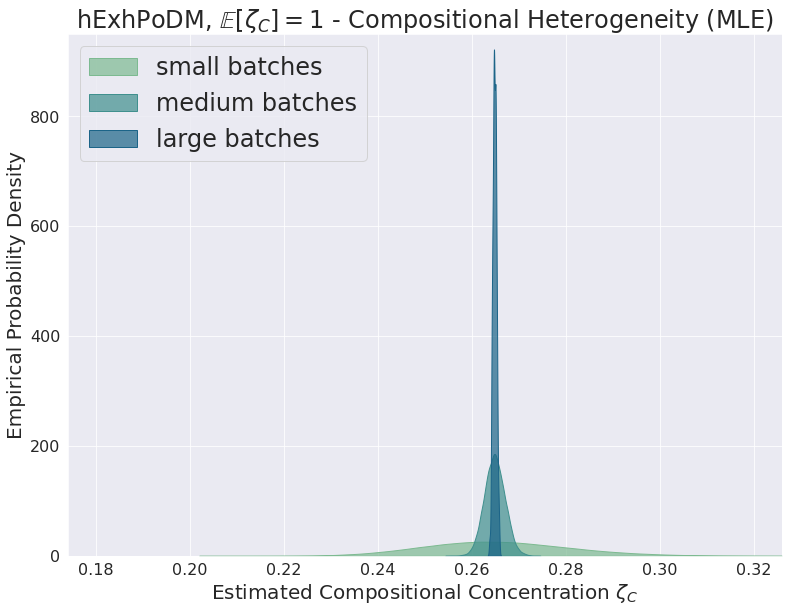

In [12]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8,9.6))
    axis = sns.kdeplot(small_part(small_batches_compositions,3), fill=True, color=crest(0), alpha=0.7)
    sns.kdeplot(medium_batches_compositions, ax=axis, fill=True, color=crest(2), alpha=0.7)
    sns.kdeplot(large_batches_compositions, ax=axis, fill=True, color=crest(4), alpha=0.7)
    axis.legend(labels=["small batches", "medium batches", "large batches"], 
                fontsize=24, loc="upper left")
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.174,0.326))
    axis.set_ylim((0,950))
    title = 'hExhPoDM, $\mathbb{E}[\zeta_C]=1$ - Compositional Heterogeneity (MLE)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

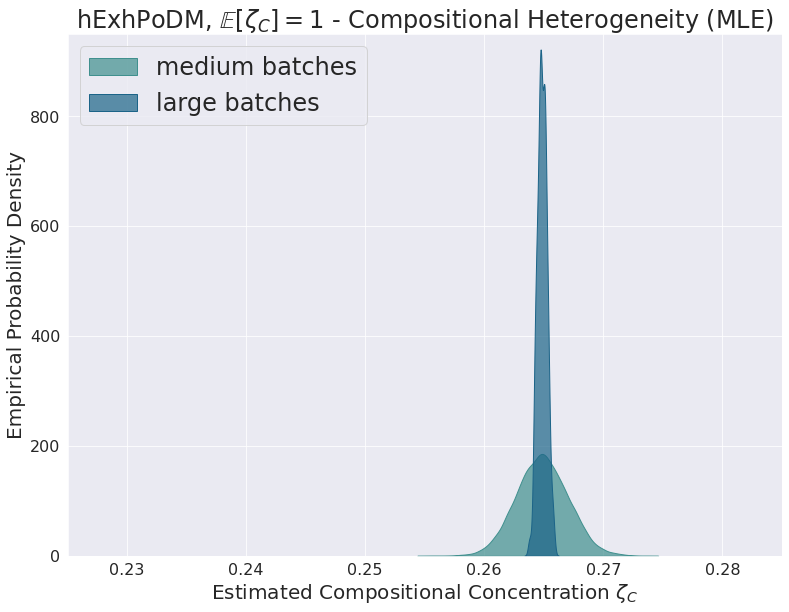

In [13]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8,9.6))
    axis = sns.kdeplot(medium_batches_compositions, fill=True, color=crest(2), alpha=0.7)
    sns.kdeplot(large_batches_compositions, ax=axis, fill=True, color=crest(4), alpha=0.7)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24, loc="upper left")
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.225,0.285))
    axis.set_ylim((0,950))
    title = 'hExhPoDM, $\mathbb{E}[\zeta_C]=1$ - Compositional Heterogeneity (MLE)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' zoom')

OK so interestingly these do still converge to a limiting value, and the value is different from the one the plugins converge to ($\approx 0.24$), _and_ at the same time it is also fairly similar.

But anyway that they do not converge to the same value is indicative of the model misspecification so that's good at least, that my claims that ghNBDM is most likely at least slightly misspecified for hExhPoDM are not BS